# 데이터프레임 (조건에 따른 조작)

In [1]:
# 라이브러리 임포트
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

# 소수점 3자리까지 표시
%precision 3

'%.3f'

In [2]:
data = pd.read_csv('health2018.csv')
data_raw = data
data

,ID,sex,age,height,weight,waist,BMI,Blood_glucose
0,A901020501,M,80,162.4,56.0,82.2,21.233226,103
1,A901021301,M,78,167.7,76.4,98.3,27.166096,127
2,A901021302,F,75,157.7,53.2,80.7,21.391845,134
3,A901022601,F,43,151.0,53.5,79.7,23.463883,99
4,A901023303,F,80,146.1,57.6,93.0,26.984977,111
...,...,...,...,...,...,...,...,...
5963,R904028502,F,35,159.8,55.6,70.1,21.773149,90
5964,R904028503,F,66,156.9,63.9,87.3,25.957028,93
5965,R904028902,F,73,145.2,51.8,77.2,24.569512,99
5966,R904029201,M,43,176.8,84.1,99.2,26.904906,108


### 데이터프레임 객체의 조건 지정

In [3]:
# 다중조건 지정 실습
# (아래는 작동하지 않음)
data[data.age >= 20 & data.age < 30]

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [7]:
# 아래는 작동하나, and를 사용할 경우 작동하지 않음  
# &는 비트 단위, 2진수 단위에서 사용, 1&0 = 0 , 1&1=1, 10&11 =10
# and 시리즈 내에서 참, 거짓 판단 불가
# (and: 논리연산자, &: 비트연산자).
data[(data.age >= 20) & (data.age < 30)]

,ID,sex,age,height,weight,waist,BMI,Blood_glucose
12,A901024803,M,27,188.4,126.7,106.9,35.695611,90
13,A901024804,M,26,177.9,85.5,90.5,27.015575,96
68,A903022202,F,23,158.8,42.5,61.6,16.853416,86
104,A904024203,M,29,188.2,67.0,71.6,18.916273,93
113,A904027203,F,26,169.9,58.5,66.5,20.266050,85
...,...,...,...,...,...,...,...,...
5931,R903029201,M,25,193.0,74.5,76.4,20.000537,95
5934,R903033301,M,25,174.7,73.8,89.2,24.180794,97
5935,R903034901,M,22,173.2,67.1,73.1,22.367979,94
5936,R903035101,M,22,175.5,63.0,74.1,20.454379,99


In [10]:
# 단일 조건을 사용한 경우에도, 내부 변수값을 조작할 수 없음.
# data[조건식] 형태로 지정한 경우, 해당 조건에 대응하는 행+열만 추출하여 '새로운' 데이터프레임 객체로 반환하기 때문.
data[data.age >= 30].BMI = 0

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [11]:
d1 = data[data.age >= 30] #새로운 데이터프레임 객체를 만들어서 사용하면 가능능
d1.BMI = 0
d1

,ID,sex,age,height,weight,waist,BMI,Blood_glucose
0,A901020501,M,80,162.4,56.0,82.2,0,103
1,A901021301,M,78,167.7,76.4,98.3,0,127
2,A901021302,F,75,157.7,53.2,80.7,0,134
3,A901022601,F,43,151.0,53.5,79.7,0,99
4,A901023303,F,80,146.1,57.6,93.0,0,111
...,...,...,...,...,...,...,...,...
5963,R904028502,F,35,159.8,55.6,70.1,0,90
5964,R904028503,F,66,156.9,63.9,87.3,0,93
5965,R904028902,F,73,145.2,51.8,77.2,0,99
5966,R904029201,M,43,176.8,84.1,99.2,0,108


### 단일조건: 비만 (BMI >= 25) 조건 열 추가하기

In [12]:
# for 문과 if 문을 이용한 방법
data['obesity'] = ['Obese' if b >= 25 else 'Normal' for b in data['BMI']] #데이터'bmi' 를 b에 넣는 루프를 돌리고, if문 실행
data

,ID,sex,age,height,weight,waist,BMI,Blood_glucose,obesity
0,A901020501,M,80,162.4,56.0,82.2,21.233226,103,Normal
1,A901021301,M,78,167.7,76.4,98.3,27.166096,127,Obese
2,A901021302,F,75,157.7,53.2,80.7,21.391845,134,Normal
3,A901022601,F,43,151.0,53.5,79.7,23.463883,99,Normal
4,A901023303,F,80,146.1,57.6,93.0,26.984977,111,Obese
...,...,...,...,...,...,...,...,...,...
5963,R904028502,F,35,159.8,55.6,70.1,21.773149,90,Normal
5964,R904028503,F,66,156.9,63.9,87.3,25.957028,93,Obese
5965,R904028902,F,73,145.2,51.8,77.2,24.569512,99,Normal
5966,R904029201,M,43,176.8,84.1,99.2,26.904906,108,Obese


In [42]:
# np.where() 메소드 활용
#np. where(): Where True, yield `x`, otherwise yield `y`.
data['obesity'] = np.where(data['BMI'] > 25, '비만', '정상')
data

,ID,sex,age,height,weight,waist,BMI,Blood_glucose,obesity,new1
0,A901020501,M,80,162.4,56.0,82.2,21.233226,103,정상,0
1,A901021301,M,78,167.7,76.4,98.3,27.166096,127,비만,0
2,A901021302,F,75,157.7,53.2,80.7,21.391845,134,정상,0
3,A901022601,F,43,151.0,53.5,79.7,23.463883,99,정상,0
4,A901023303,F,80,146.1,57.6,93.0,26.984977,111,비만,0
...,...,...,...,...,...,...,...,...,...,...
5963,R904028502,F,35,159.8,55.6,70.1,21.773149,90,정상,0
5964,R904028503,F,66,156.9,63.9,87.3,25.957028,93,비만,0
5965,R904028902,F,73,145.2,51.8,77.2,24.569512,99,정상,0
5966,R904029201,M,43,176.8,84.1,99.2,26.904906,108,비만,0


### 다중조건: 정상 (BMI 18.5-23), 과체중 (BMI 23-25), 비만 (BMI >= 25) 조건 분류

In [43]:
# for문과 if문 활용
data['obesity'] = ['Obese' if b >= 25 else 'Overweight' if b >= 23  else 'Normal' for b in data['BMI']]
data

,ID,sex,age,height,weight,waist,BMI,Blood_glucose,obesity,new1
0,A901020501,M,80,162.4,56.0,82.2,21.233226,103,Normal,0
1,A901021301,M,78,167.7,76.4,98.3,27.166096,127,Obese,0
2,A901021302,F,75,157.7,53.2,80.7,21.391845,134,Normal,0
3,A901022601,F,43,151.0,53.5,79.7,23.463883,99,Overweight,0
4,A901023303,F,80,146.1,57.6,93.0,26.984977,111,Obese,0
...,...,...,...,...,...,...,...,...,...,...
5963,R904028502,F,35,159.8,55.6,70.1,21.773149,90,Normal,0
5964,R904028503,F,66,156.9,63.9,87.3,25.957028,93,Obese,0
5965,R904028902,F,73,145.2,51.8,77.2,24.569512,99,Overweight,0
5966,R904029201,M,43,176.8,84.1,99.2,26.904906,108,Obese,0


In [18]:
# np.select() 메소드 활용, np.where()이랑 비슷함. 조건을 여러개 만들 수 있다. 
condition_list = [(data.BMI >=25), 
                  (data.BMI < 25) & (data.BMI >= 23), 
                  (data.BMI < 23) ]
choice_list = [ '비만', '과체중', '정상' ]
data['obesity'] = np.select(condition_list, choice_list, default = 'NaN')
data

,ID,sex,age,height,weight,waist,BMI,Blood_glucose,obesity
0,A901020501,M,80,162.4,56.0,82.2,21.233226,103,정상
1,A901021301,M,78,167.7,76.4,98.3,27.166096,127,비만
2,A901021302,F,75,157.7,53.2,80.7,21.391845,134,정상
3,A901022601,F,43,151.0,53.5,79.7,23.463883,99,과체중
4,A901023303,F,80,146.1,57.6,93.0,26.984977,111,비만
...,...,...,...,...,...,...,...,...,...
5963,R904028502,F,35,159.8,55.6,70.1,21.773149,90,정상
5964,R904028503,F,66,156.9,63.9,87.3,25.957028,93,비만
5965,R904028902,F,73,145.2,51.8,77.2,24.569512,99,과체중
5966,R904029201,M,43,176.8,84.1,99.2,26.904906,108,비만


In [19]:
data['new1'] = 0
data.new2 = 0 
data

,ID,sex,age,height,weight,waist,BMI,Blood_glucose,obesity,new1
0,A901020501,M,80,162.4,56.0,82.2,21.233226,103,정상,0
1,A901021301,M,78,167.7,76.4,98.3,27.166096,127,비만,0
2,A901021302,F,75,157.7,53.2,80.7,21.391845,134,정상,0
3,A901022601,F,43,151.0,53.5,79.7,23.463883,99,과체중,0
4,A901023303,F,80,146.1,57.6,93.0,26.984977,111,비만,0
...,...,...,...,...,...,...,...,...,...,...
5963,R904028502,F,35,159.8,55.6,70.1,21.773149,90,정상,0
5964,R904028503,F,66,156.9,63.9,87.3,25.957028,93,비만,0
5965,R904028902,F,73,145.2,51.8,77.2,24.569512,99,과체중,0
5966,R904029201,M,43,176.8,84.1,99.2,26.904906,108,비만,0


***

# 데이터 시각화

In [20]:
# 라이브러리 임포트
import numpy as np
import numpy.random as random
import scipy as sp
import pandas as pd
from pandas import Series, DataFrame

# 시각화 라이브러리
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
sns.set()
%matplotlib inline

# 소수점 3자리까지 표시
%precision 3

'%.3f'

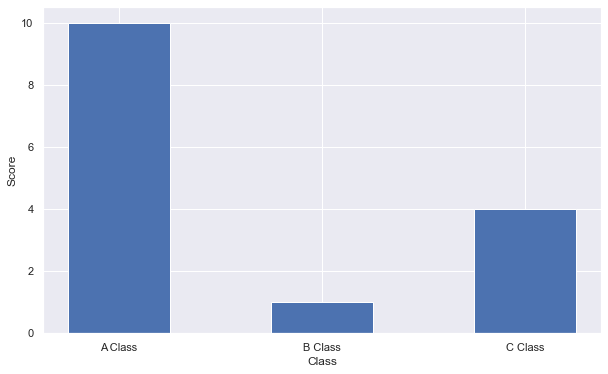

In [21]:
# 대상 데이터
x = [1, 2, 3]
y = [10, 1, 4]

# 그래프 크기 지정  
plt.figure(figsize = (10, 6))

plt.bar(x, y, align='center', width = 0.5)

# 막대 그래프의 각 레이블
plt.xticks(x, ['A Class', 'B Class', 'C Class'])

# x와 y 레이블 설정
plt.xlabel('Class')
plt.ylabel('Score')

# 그리드 표시
plt.grid(True)

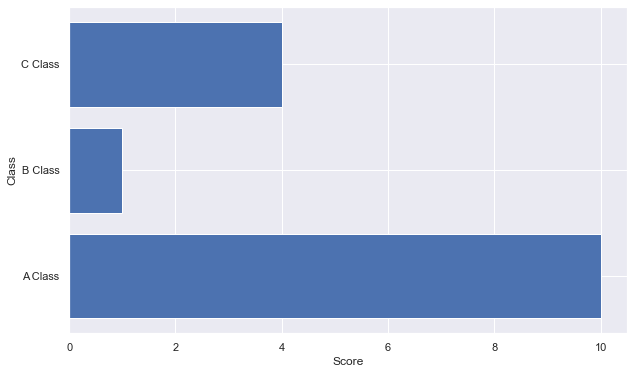

In [22]:
# 대상 데이터
x = [1, 2, 3]
y = [10, 1, 4]

# 그래프 크기 지정 
plt.figure(figsize = (10, 6))

plt.barh(x, y, align = 'center') #horizenbar 
plt.yticks(x, ['A Class','B Class','C Class'])
plt.ylabel('Class')
plt.xlabel('Score')
plt.grid(True)

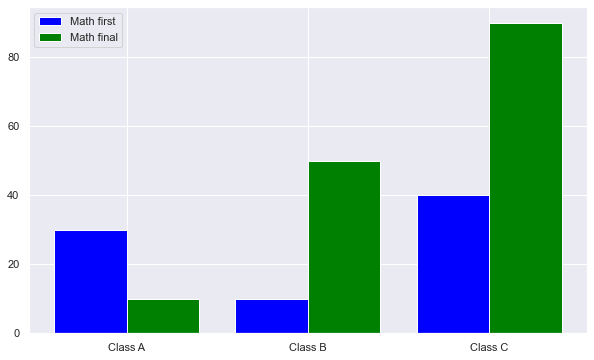

In [27]:
# 데이터 생성
y1 = np.array([30, 10, 40])
y2 = np.array([10, 50, 90])

# X축 데이터
x = np.arange(len(y1))

# 그래프 너비
w = 0.4

# 그래프 크기 지정
plt.figure(figsize = (10, 6))

# 그래프 출력. y2는 막대의 너비만큼 오른쪽으로 이동시켜 그림
plt.bar(x, y1, color = 'blue', width = w, label = 'Math first', align = 'center')
plt.bar(x + w, y2, color='green', width = w, label = 'Math final', align = 'center')

# 최적 위치에 범례 배치
plt.legend(loc = 'best')

plt.xticks(x + w / 2, ['Class A', 'Class B', 'Class C'])
plt.grid(True)

## 누적 막대그래프

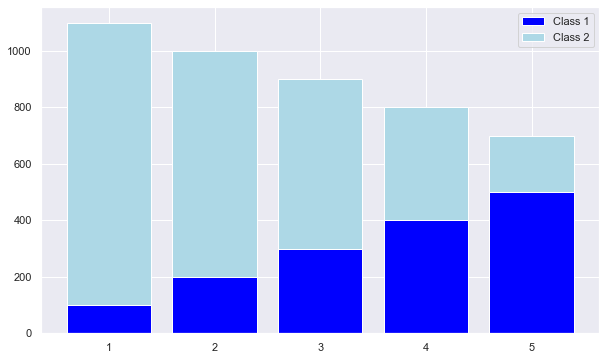

In [28]:
# 데이터 생성
height1 = np.array([100, 200, 300, 400, 500])
height2 = np.array([1000, 800, 600, 400, 200])

# X축
x = np.array([1, 2, 3, 4, 5]) 

# 그래프 크기 지정 
plt.figure(figsize = (10, 6))

# 그래프 출력
p1 = plt.bar(x, height1, color = 'blue')
p2 = plt.bar(x, height2, bottom = height1, color='lightblue') #bottom을 지정해줌, 0부터가 아니라 height1부터 시작하도록 한다, 위에 쌓는거

# 범례 표시 
plt.legend((p1[0], p2[0]), ('Class 1', 'Class 2'))

## 원그래프

(-1.2142507666786346,
 1.134711077927507,
 -1.1258468317413044,
 1.101230806657754)

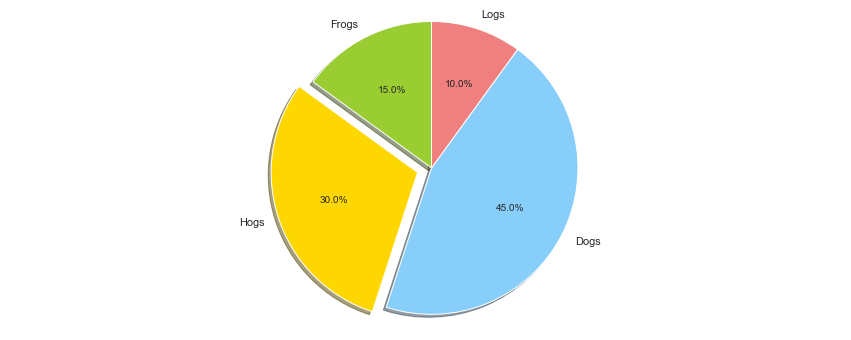

In [34]:
labels = ['Frogs', 'Hogs', 'Dogs', 'Logs']
sizes = [15, 30, 45, 10]
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']
explode = (0, 0.1, 0, 0) 

# 그래프 크기 지정
plt.figure(figsize = (15, 6))

# 그래프 출력
plt.pie(sizes, explode = explode, labels = labels, colors = colors,
        autopct = '%1.1f%%', shadow = True, startangle = 90) 
#startangle 시작하는 각도, counterclock = False 시계 반대방향, autopct = 소수점 첫째짜리까지 확률

# counterclock = False 옵션을 추가해볼 것.

# 원을 그림
plt.axis('equal')

In [35]:
help(plt.pie)

Help on function pie in module matplotlib.pyplot:

pie(x, explode=None, labels=None, colors=None, autopct=None, pctdistance=0.6, shadow=False, labeldistance=1.1, startangle=None, radius=None, counterclock=True, wedgeprops=None, textprops=None, center=(0, 0), frame=False, rotatelabels=False, *, data=None)
    Plot a pie chart.
    
    Make a pie chart of array *x*.  The fractional area of each wedge is
    given by ``x/sum(x)``.  If ``sum(x) < 1``, then the values of *x* give
    the fractional area directly and the array will not be normalized. The
    resulting pie will have an empty wedge of size ``1 - sum(x)``.
    
    The wedges are plotted counterclockwise, by default starting from the
    x-axis.
    
    Parameters
    ----------
    x : array-like
        The wedge sizes.
    
    explode : array-like, optional, default: None
        If not *None*, is a ``len(x)`` array which specifies the fraction
        of the radius with which to offset each wedge.
    
    labels : list,

## 버블, scatter

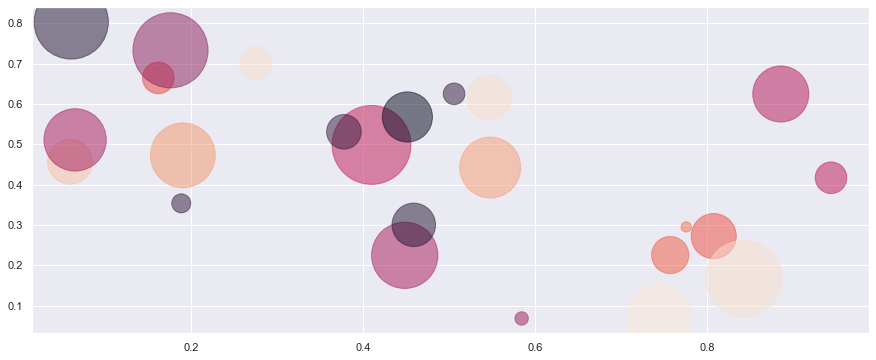

In [36]:
N = 25

# 무작위로 X, Y 데이터 생성
x = np.random.rand(N)
y = np.random.rand(N)

# color 번호
colors = np.random.rand(N) #무작위

# 버블의 크기를 다양하게 함
area = 10 * np.pi * (15 * np.random.rand(N)) ** 2

# 그래프 크기 지정
plt.figure(figsize = (15, 6))

# 그래프 출력
plt.scatter(x, y, s = area, c = colors, alpha = 0.5) 
plt.grid(True)

In [37]:
help(plt.scatter)

Help on function scatter in module matplotlib.pyplot:

scatter(x, y, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, verts=<deprecated parameter>, edgecolors=None, *, plotnonfinite=False, data=None, **kwargs)
    A scatter plot of *y* vs. *x* with varying marker size and/or color.
    
    Parameters
    ----------
    x, y : scalar or array-like, shape (n, )
        The data positions.
    
    s : scalar or array-like, shape (n, ), optional
        The marker size in points**2.
        Default is ``rcParams['lines.markersize'] ** 2``.
    
    c : array-like or list of colors or color, optional
        The marker colors. Possible values:
    
        - A scalar or sequence of n numbers to be mapped to colors using
          *cmap* and *norm*.
        - A 2-D array in which the rows are RGB or RGBA.
        - A sequence of colors of length n.
        - A single color format string.
    
        Note that *c* should not be a single 

### 데이터프레임 기반 그래프 그리기: barplot, boxplot, violinplot

In [38]:
# seaborn 내장 붓꽃 데이터 검색
iris = sns.load_dataset("iris")
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


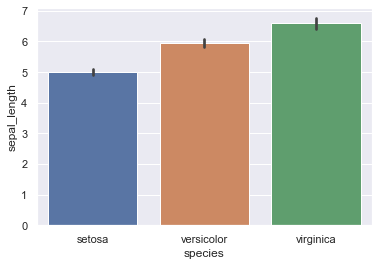

In [39]:
# 막대그래프(barplot) 예시
sns.barplot(x = "species", y  = "sepal_length", data = iris)

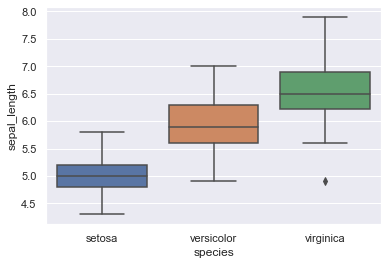

In [40]:
# 박스플롯(boxplot) 예시
sns.boxplot(x = "species", y  = "sepal_length", data = iris)

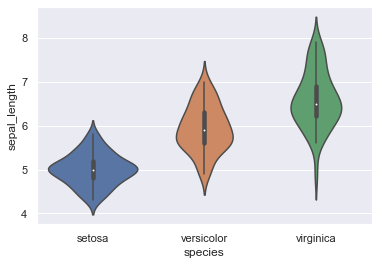

In [41]:
# 바이올린플롯(violinplot) 예시
sns.violinplot(x = "species", y  = "sepal_length", data = iris)